### CUSTOMER SEGMENTATION:
What is it?<p>
Customer segmentation is the process of dividing a company's customers into distinct groups based on various characteristics and behaviors.<p>
Here are some common methods and criteria used for customer segmentation:<p>
1-Demographic Segmentation<p>
2-Geographic Segmentation<p>
3-Psychographic Segmentation<p>
4-Behavioral Segmentation<p>
5-Technographic Segmentation<p>
6-Firmographic Segmentation<p>
7-Needs-based Segmentation<p>

### Case I: Mall Customer Segmentation:

In [28]:
#Importing Neccessary Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Loading Data:
mall_data = pd.read_csv("Mall_Customers.csv")
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
plt.style.use('fivethirtyeight')


Text(0.5, 1.0, 'Gender Division')

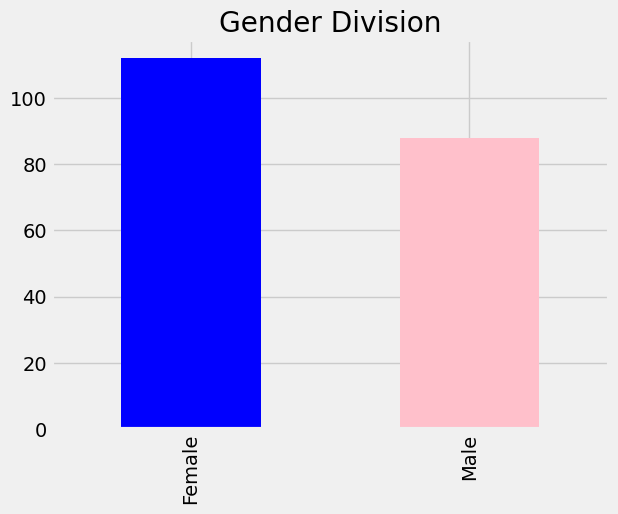

In [32]:
gender = mall_data["Gender"].value_counts()
gender.plot(kind="bar",color=['blue',"pink"])
plt.title("Gender Division")

Text(0, 0.5, 'count')

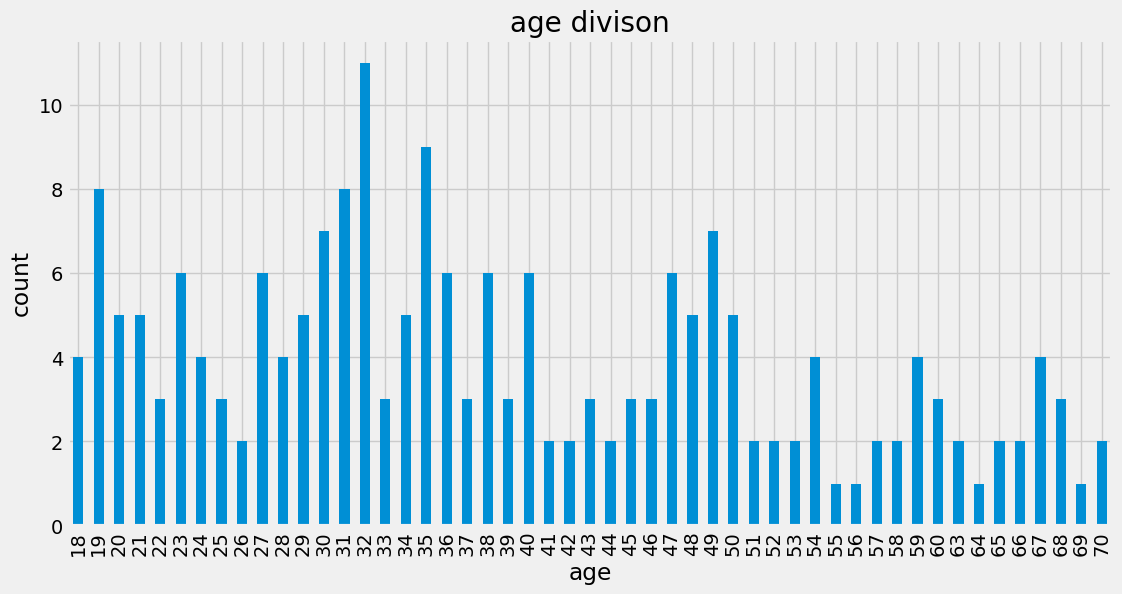

In [33]:
plt.figure(figsize=(12,6))
mall_data["Age"].value_counts().sort_index().plot(kind='bar')
plt.title("age divison")
plt.xlabel('age')
plt.ylabel('count')

In [34]:
mall_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0, 0.5, 'spending score (0-100)')

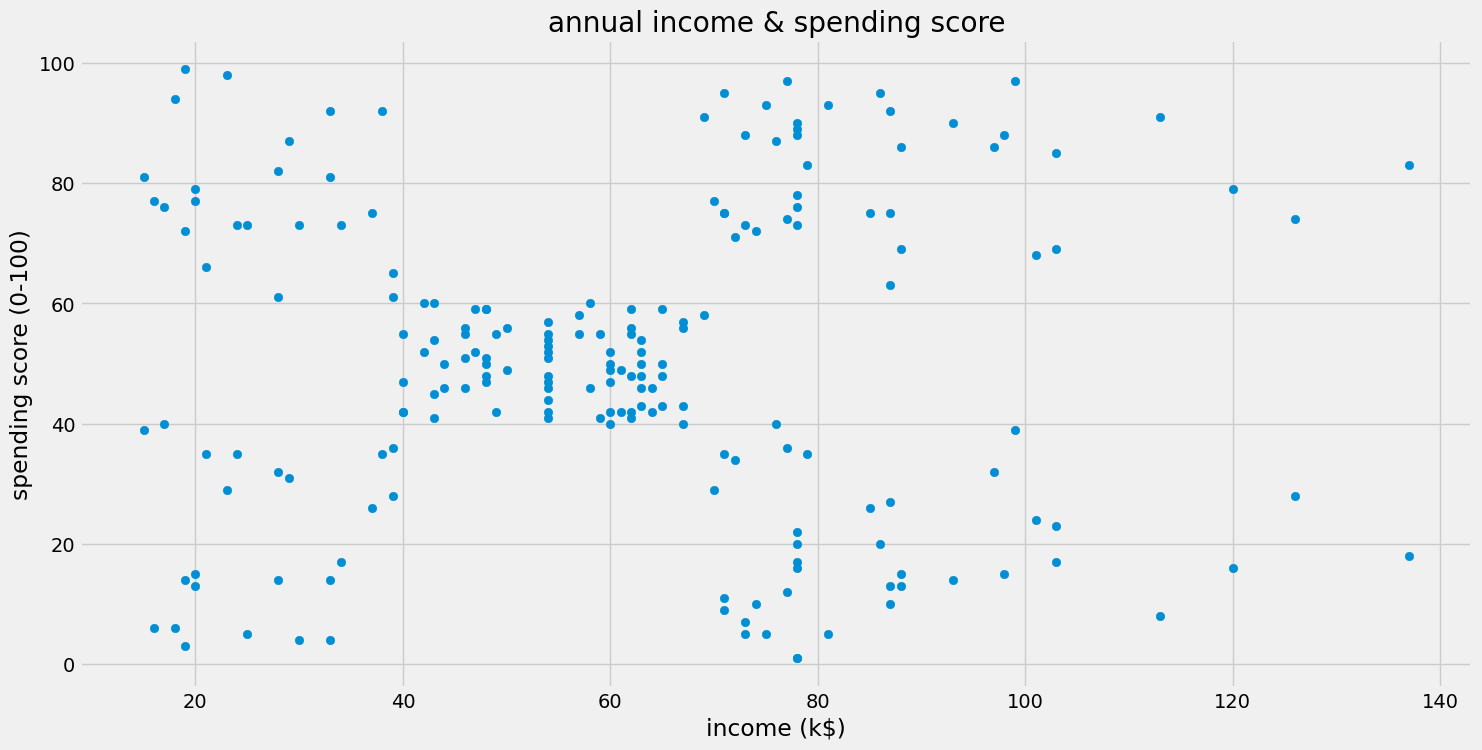

In [35]:
plt.figure(figsize=(16,8))
plt.title('annual income & spending score')
plt.scatter(mall_data['Annual Income (k$)'],mall_data['Spending Score (1-100)'])
plt.xlabel('income (k$)')
plt.ylabel('spending score (0-100)')

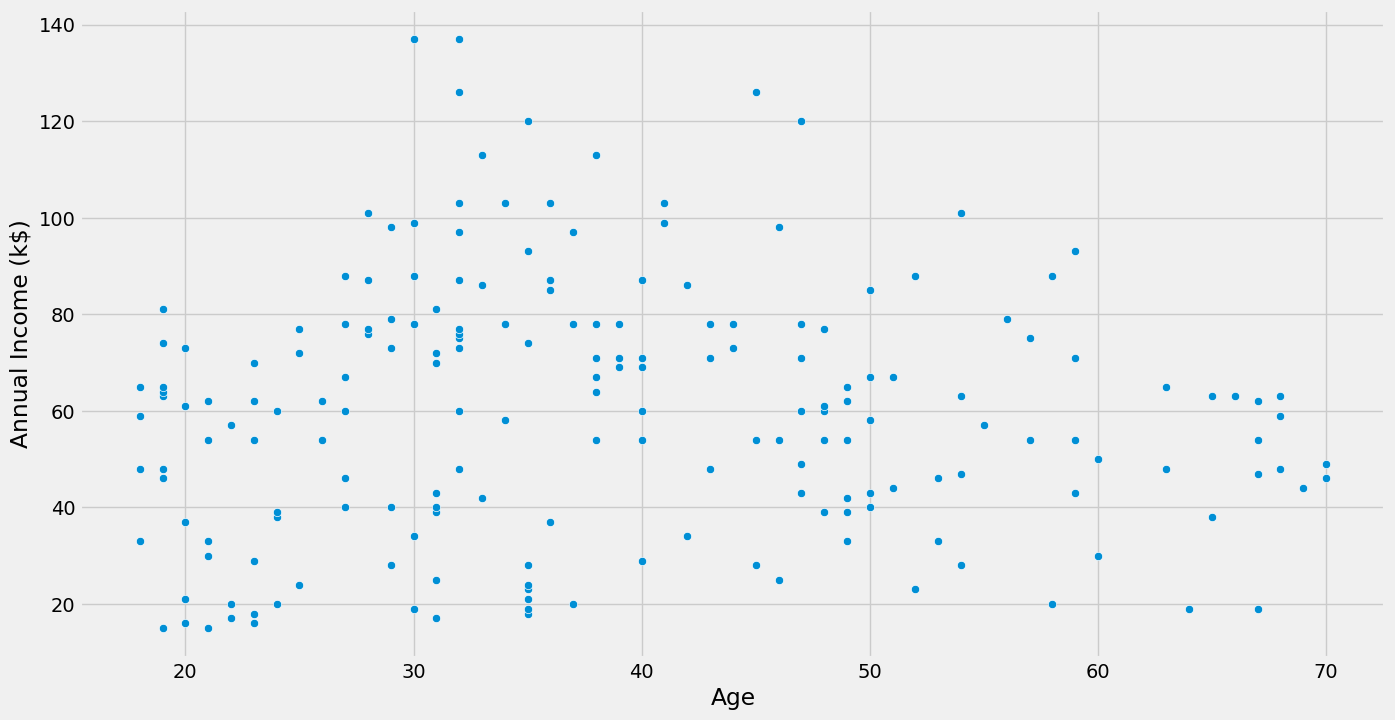

In [36]:
plt.figure(figsize=(15,8)) 
ax = sns.scatterplot(x=mall_data['Age'],y=mall_data['Annual Income (k$)'])

([<matplotlib.axis.YTick at 0x2c5b9e4bee0>,
 [Text(0, 0, 'CustomerID'),
  Text(0, 1, 'Age'),
  Text(0, 2, 'Annual Income (k$)'),
  Text(0, 3, 'Spending Score (1-100)')])

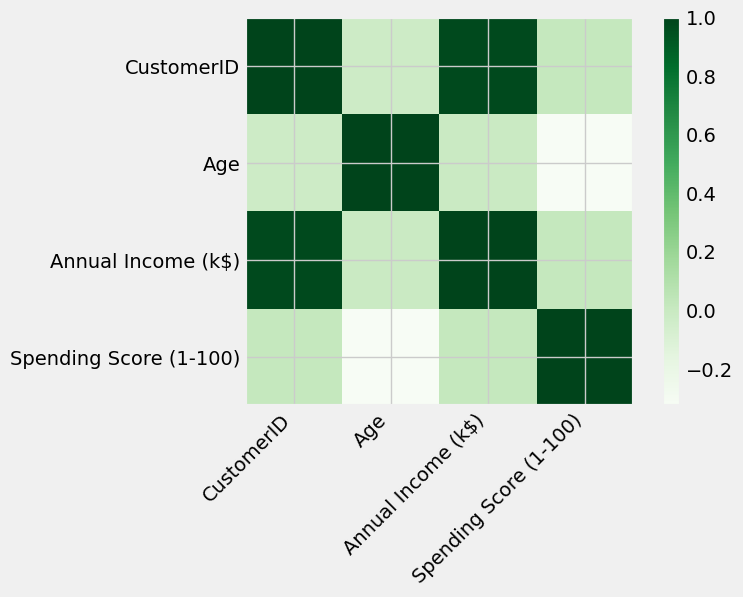

In [37]:
corr_matrix = mall_data.corr()
plt.imshow(corr_matrix,cmap='Greens')
plt.colorbar()
variables = []
for i in corr_matrix.columns:
    variables.append(i)
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

As correlation chart shows, age-annual income and annual income-spending score has the higest correlations. For income and spending score we can do clustering and for age and income we can analyze and predict the future data with regression analysis.

#### Clustering for annual_income-spending_score:<p>
K-Means Clustering:<p>
We have 5 different clusters in our data set.<p>


Text(0.5, 1.0, 'K-Means Clustering')

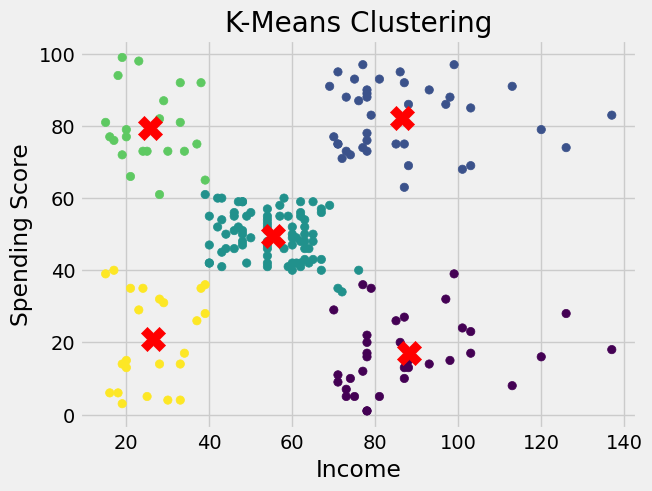

In [38]:
X = np.array(mall_data[['Annual Income (k$)','Spending Score (1-100)']])
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')

##### Poly-Regression for age-income:

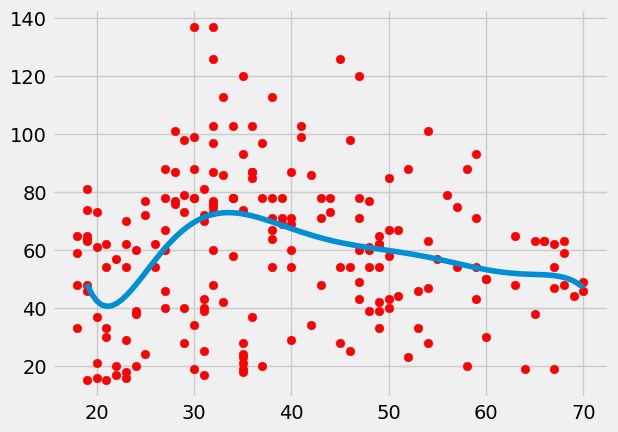

In [39]:
poly = np.poly1d(np.polyfit(mall_data['Age'],mall_data['Annual Income (k$)'],7))
line = np.linspace(19, 70, 100)
plt.scatter(mall_data['Age'],mall_data['Annual Income (k$)'],color='red')
plt.plot(line, poly(line))

### Case II: Bank Customer Segmentation:

##### Loading Data:

In [53]:
data = pd.read_csv("Bank_Customers.csv")
data.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
data.head()

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [54]:
data.describe()

,ID,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


##### Handling Null Values:

In [55]:
data.isnull().sum()

ID                    0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [56]:
print(data['Checking account'].value_counts(),"\n")
print(data['Saving accounts'].value_counts())

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


As we can see the null values on the account colums refers to the ones that don't have a account type. We can change null values into 'none'

In [57]:
data.fillna('none', inplace=True)
print(data['Checking account'].value_counts())

none        394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


In [58]:
data.head()

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,none,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,none,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


##### Explanatory Data Anlaysis:

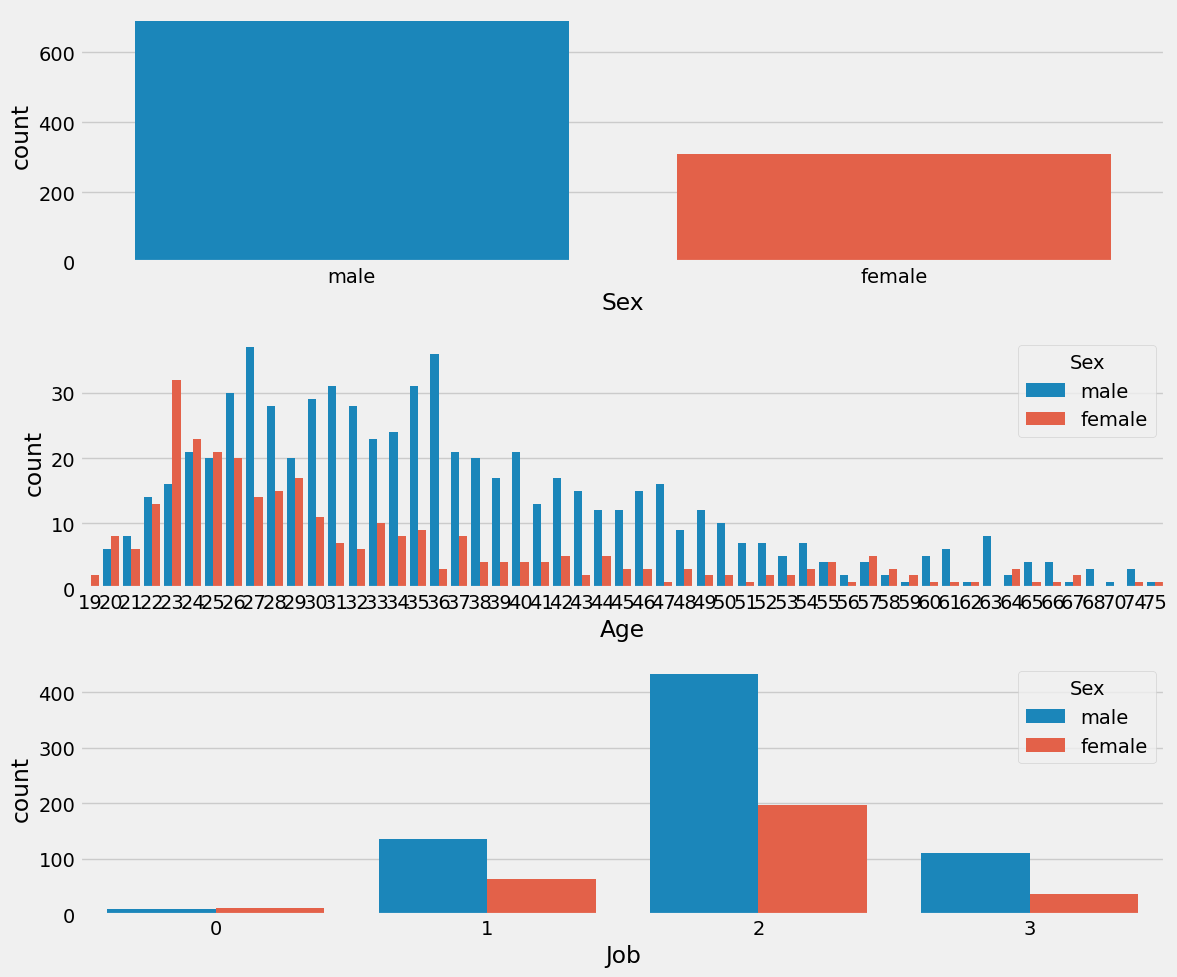

In [120]:
def countplots(data,h=None):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,10))
    sns.countplot(data,x='Sex',ax=ax1)
    sns.countplot(data,x='Age',hue=h,ax=ax2)
    sns.countplot(data,x='Job',hue=h,ax=ax3)
    plt.tight_layout()

countplots(data,'Sex')

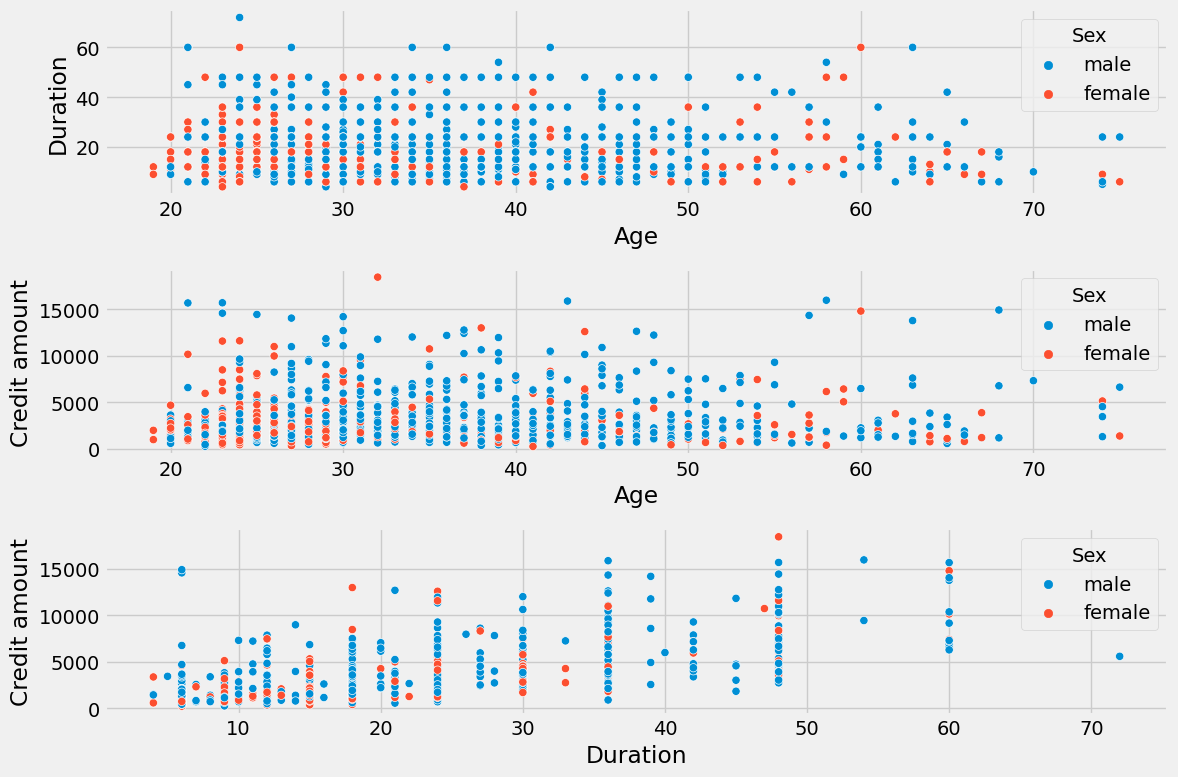

In [121]:
def scatter_plots(data,h=None,pal=None):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,8))
    sns.scatterplot(x='Age',y="Duration",hue=h, data=data, ax=ax1)
    sns.scatterplot(x='Age',y="Credit amount",hue=h, data=data, ax=ax2)
    sns.scatterplot(x='Duration',y="Credit amount",hue=h, data=data, ax=ax3)
    plt.tight_layout()

scatter_plots(data,h='Sex',)

In [128]:
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

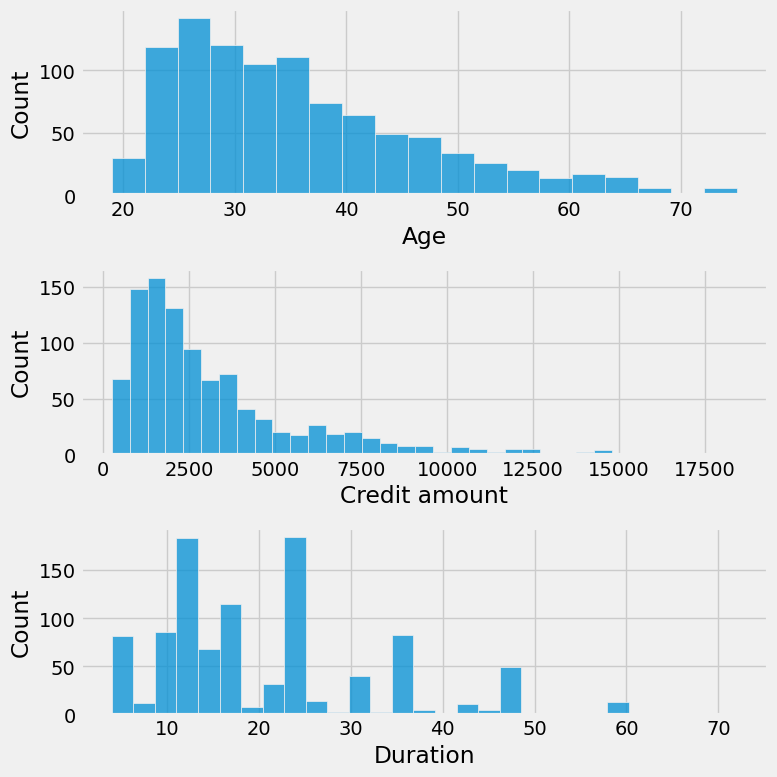

In [131]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.histplot(df["Age"], ax=ax1)
    sns.histplot(df["Credit amount"], ax=ax2)
    sns.histplot(df["Duration"], ax=ax3)
    plt.tight_layout()

distributions(cluster_data)

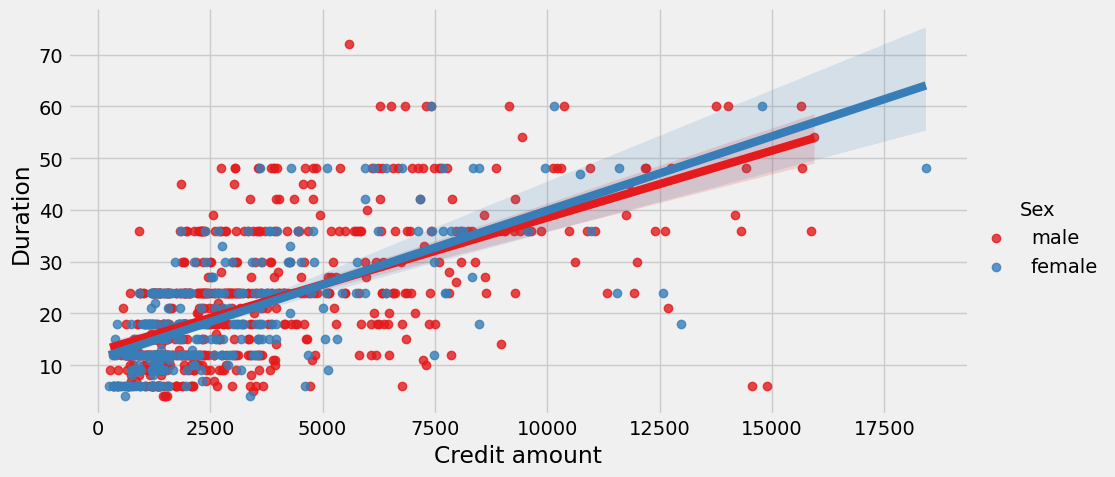

In [93]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)

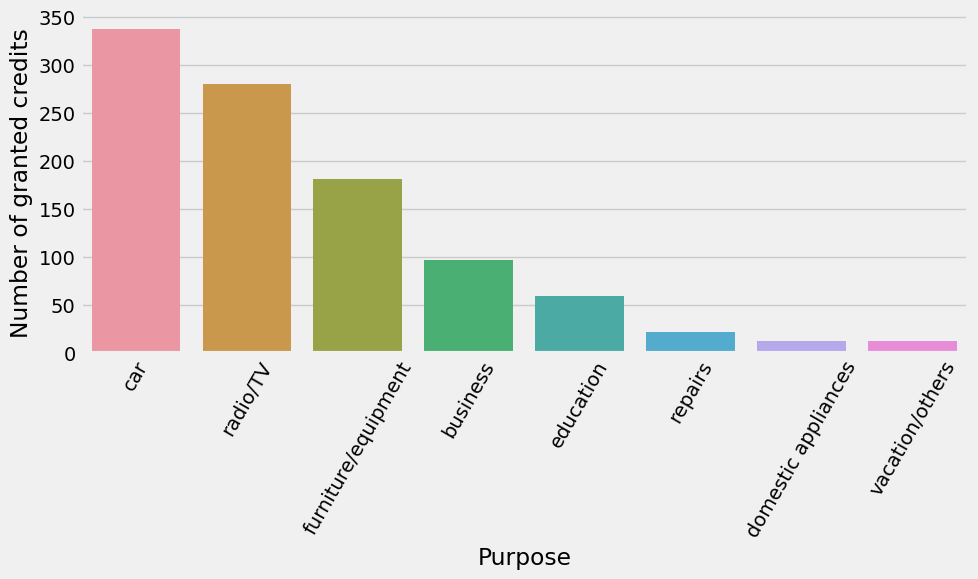

In [125]:
purposes = data.groupby('Purpose')["Age"].count().rename('Count').reset_index()
purposes.sort_values(by=["Count"], ascending=False, inplace=True)
plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=purposes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

##### Making Data Ready For Cluster:

Our data need to be scaled and normalized: So we will imply standard scaler and logarithmic transformation.

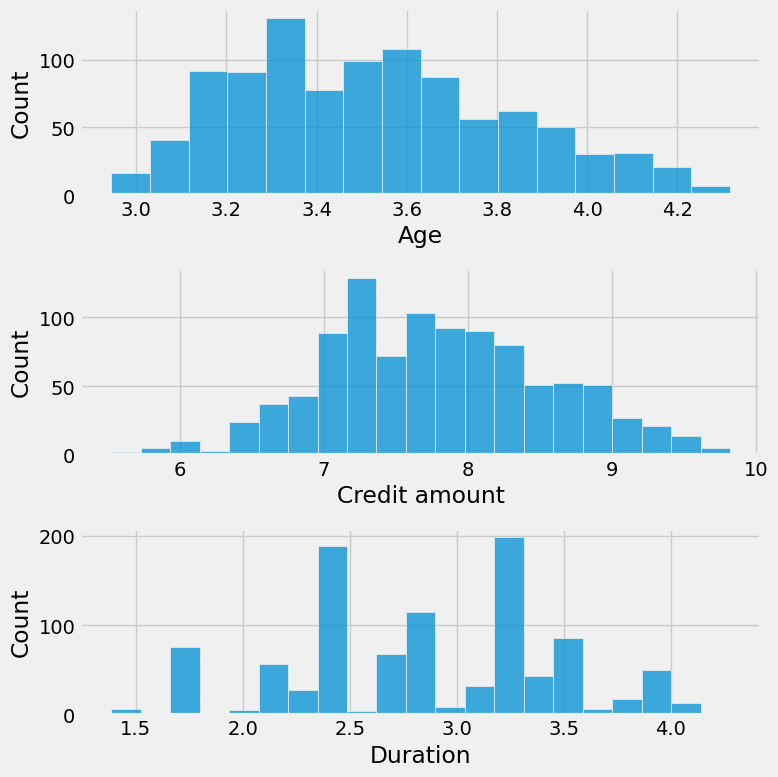

In [132]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_log_scaled = scaler.fit_transform(cluster_log)

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.<p>
So we can choose the right number of clusters by the help of inertia and on varius seeds.

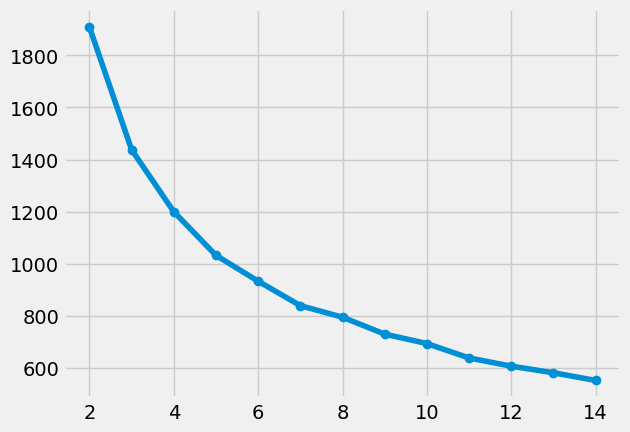

In [135]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_log_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [136]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = range(2,10)
random_range = range(0,20)
results = []

for c in cluster_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_log_scaled)
        silhouette_avg = silhouette_score(cluster_log_scaled,cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

<Axes: xlabel='seed', ylabel='n_clusters'>

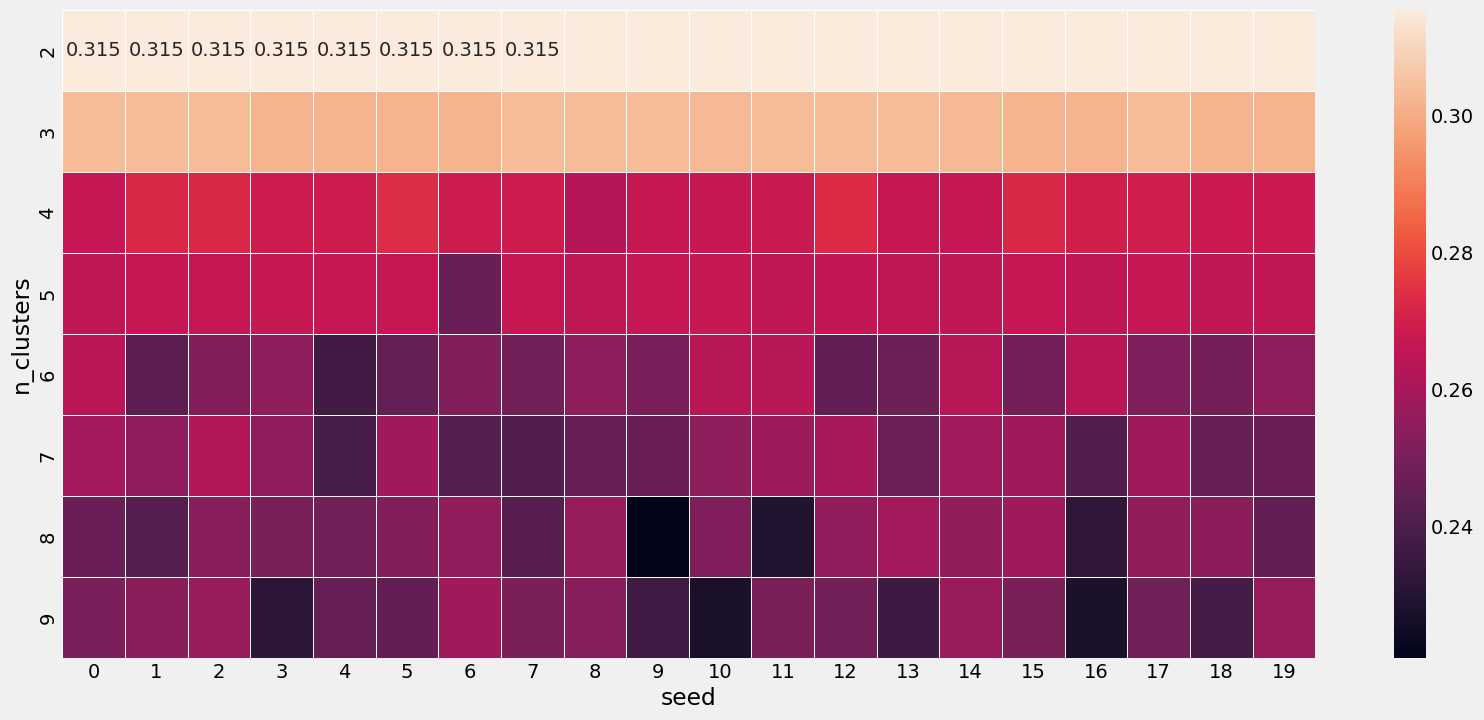

In [146]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f')

##### Clustering:

Best is to choose 2 or 3 clusters. Let's try both:

In [147]:
# 2 Clusters:
kmeans_sel2 = KMeans(n_clusters=2, random_state=1).fit(cluster_log_scaled)
labels2 = pd.DataFrame(kmeans_sel2.labels_)
clustered_data2 = cluster_data.assign(Cluster=labels2)


cluster 0:middle age,high credit, long duration.<p>
cluster 1:middle age,low credit, short duration.

In [153]:
clustered_data2.groupby(['Cluster']).mean().round(1)

,Age,Credit amount,Duration
Cluster,,,
0,35.3,5217.8,30.0
1,35.8,1586.2,13.0


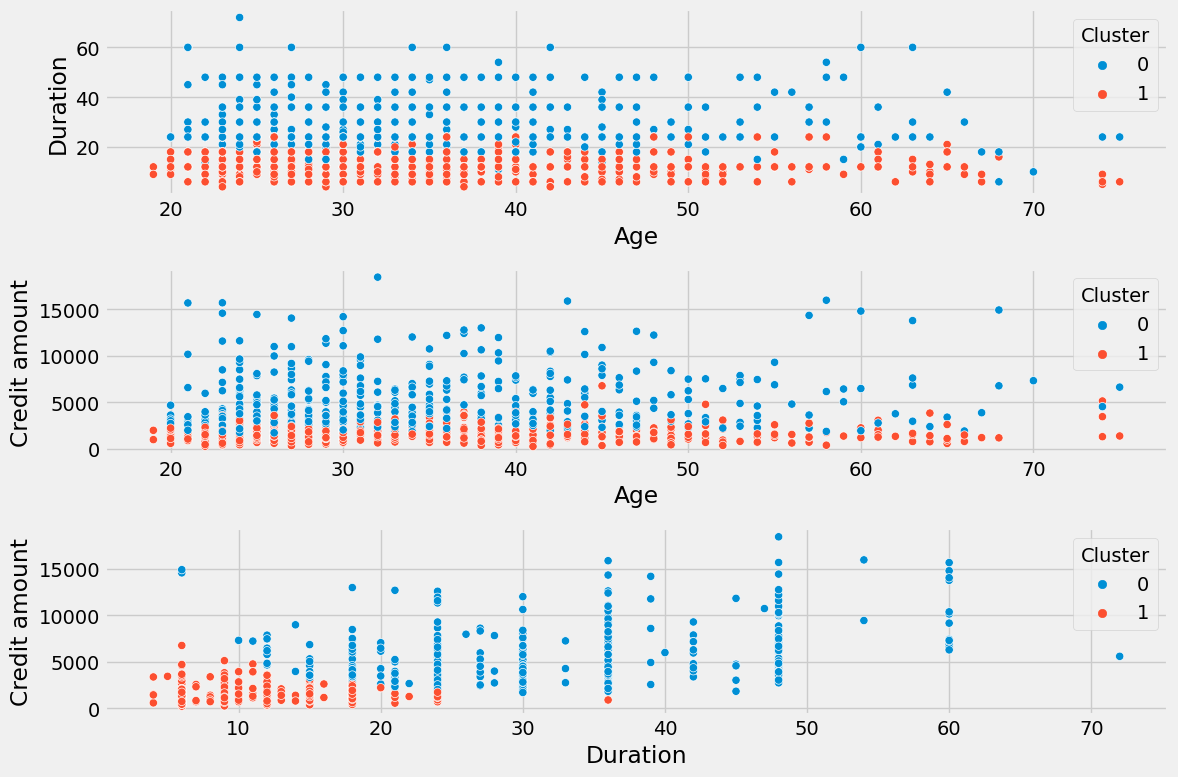

In [149]:
scatter_plots(clustered_data2,'Cluster')

In [150]:
# 3 Clusters:
kmeans_sel3 = KMeans(n_clusters=3, random_state=1).fit(cluster_log_scaled)
labels3 = pd.DataFrame(kmeans_sel3.labels_)
clustered_data3 = cluster_data.assign(Cluster=labels3)

cluster 0:long duration, high credit, middle age customers<p>
cluster 1:short duration, low credit, more elder customers<p>
cluster 2:short duration, low credit, teen customers

In [154]:
clustered_data3.groupby(['Cluster']).mean().round(1)

,Age,Credit amount,Duration
Cluster,,,
0,34.0,5665.4,32.2
1,48.7,1978.7,13.9
2,27.8,1733.6,14.2


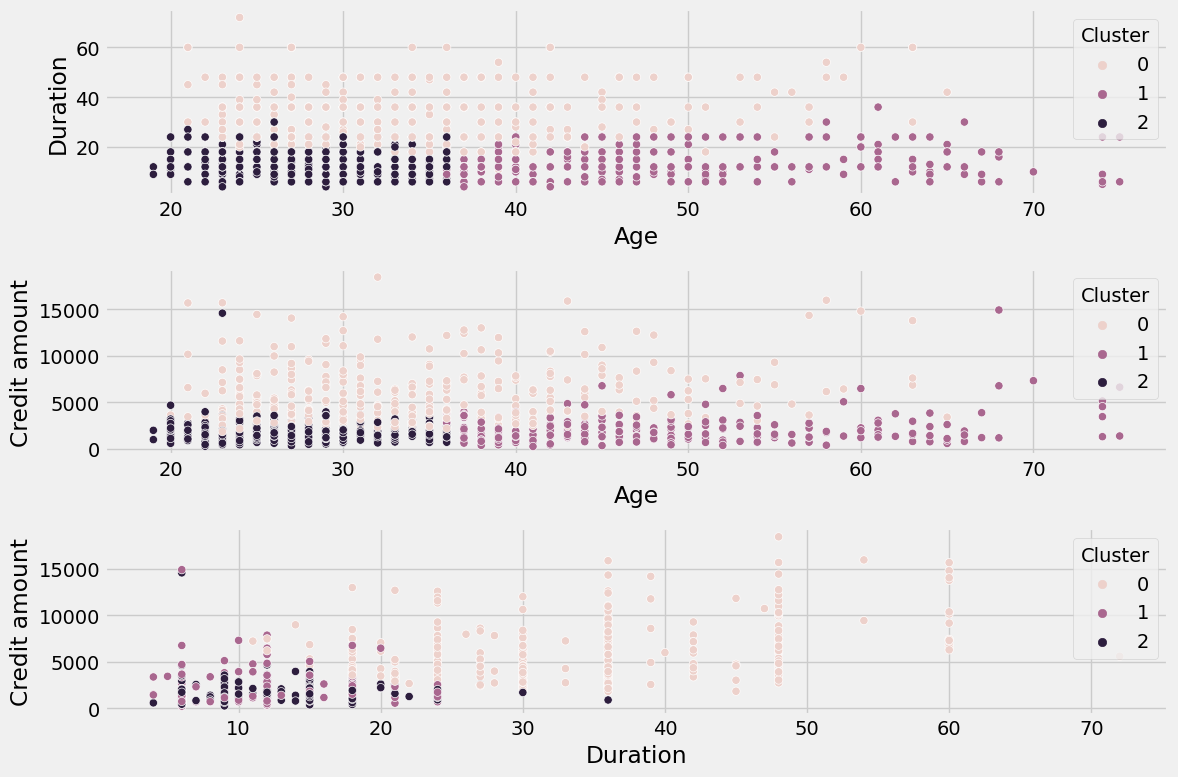

In [151]:
scatter_plots(clustered_data3,'Cluster')